In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [2]:
# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


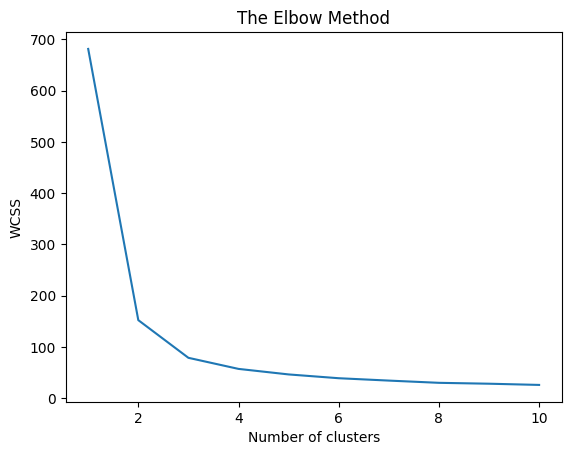

In [3]:
# Finding the optimum number of clusters for k-means classification
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # within-cluster sum of squares
plt.show()


In [4]:
# Applying k-means to the dataset with the optimum number of clusters
optimum_clusters = 3  # Based on the elbow method, usually 3 for the Iris dataset
kmeans = KMeans(n_clusters=optimum_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(data)


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


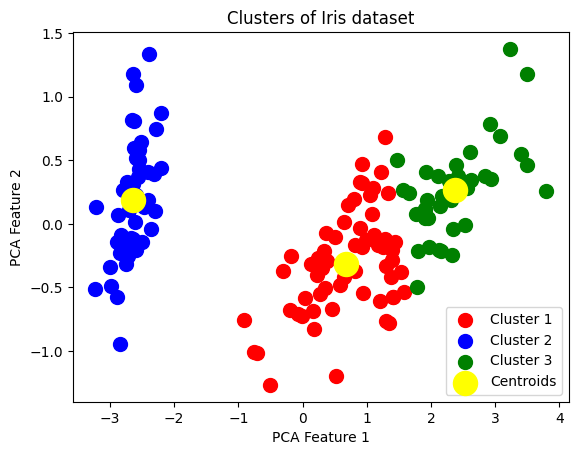

In [5]:
# Visualizing the clusters
# Using PCA to reduce the dimensions to 2 for visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plt.scatter(data_pca[y_kmeans == 0, 0], data_pca[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_pca[y_kmeans == 1, 0], data_pca[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_pca[y_kmeans == 2, 0], data_pca[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

# Plotting the centroids of the clusters
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='yellow', label='Centroids')

plt.title('Clusters of Iris dataset')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()


In [6]:
#The plot shows three distinct groups (clusters) of iris flowers based on their measurements.
#Each color represents a different cluster, showing which flowers are similar to each other.
#The yellow dots mark the center of each cluster, indicating the average position of the flowers in that group.
#This visualization helps us understand how the k-means algorithm has grouped the flowers and which features (measurements) are similar within each group.